# 1. 이미지 확인

In [2]:
import json
import cv2
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [3]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [5]:
# data path
BOX_PATH = './data/.../블랙박스'
CCTV_PATH = './data/.../CCTV'

In [1]:
# 파일 불러오기
# cctv는 데이터가 충분히 많기 때문에 실증 데이터만 활용
def load_file(file_path, data_set='input'):
    paths = []
    file_path = file_path.replace('...', data_set)
    data_list = ['/주간/맑음/실증/', '/주간/우천/실증/', '/야간/맑음/실증/', '/야간/우천/실증/']
    for i in data_list:
        file_list = os.listdir(file_path + i)
        file_list = [file_path + i + file for file in file_list]
        paths += file_list
    paths = list(set(paths))
    return paths

In [9]:
box_path = load_file(BOX_PATH)
cctv_path = load_file(CCTV_PATH)

In [5]:
# 이미지 파일 확인하기
def show_file_image(image_path):
    sample = random.sample(image_path, 5)
    for i in sample:
        print(i)
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        plt.imshow(img)
        plt.show()

./data/input/블랙박스/야간/맑음/실증/T004326_000_0160_B_N_F_0.jpg


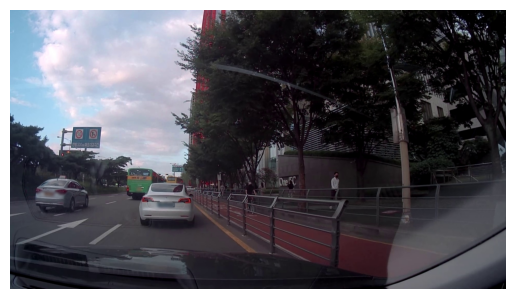

./data/input/블랙박스/주간/우천/실증/T005056_000_0168_B_D_R_0.jpg


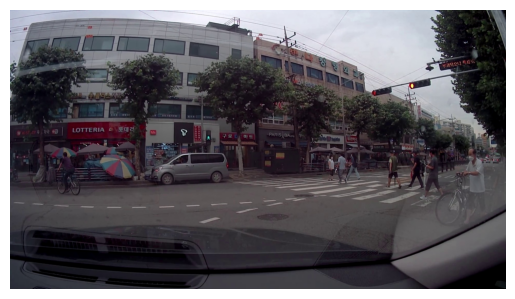

./data/input/블랙박스/야간/맑음/실증/T004376_000_0060_B_N_F_0.jpg


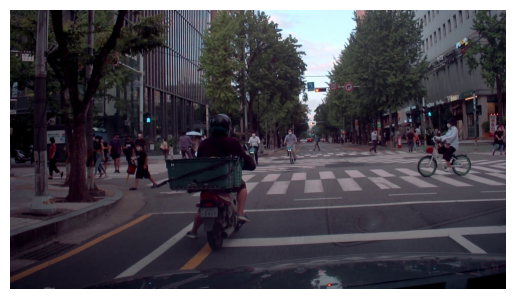

./data/input/블랙박스/주간/우천/실증/T006393_000_0036_B_D_R_0.jpg


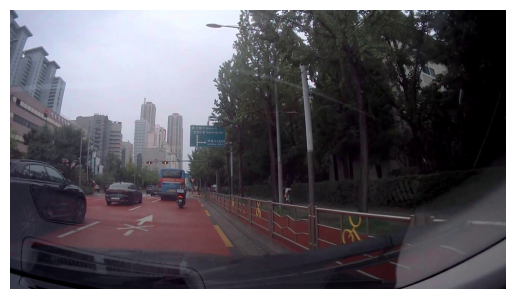

./data/input/블랙박스/주간/맑음/실증/T008586_001_0075_B_D_F_0.jpg


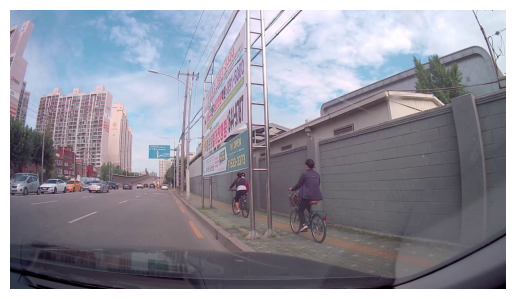

In [6]:
# 블랙박스 사진
show_file_image(box_path[:5])

./data/input/CCTV/주간/우천/실증/S000889_020_0171_C_D_R_0.jpg


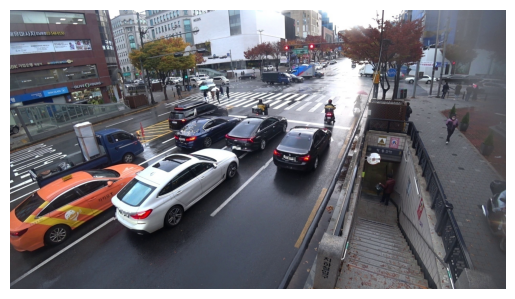

./data/input/CCTV/주간/맑음/실증/S000566_072_0150_C_D_F_0.jpg


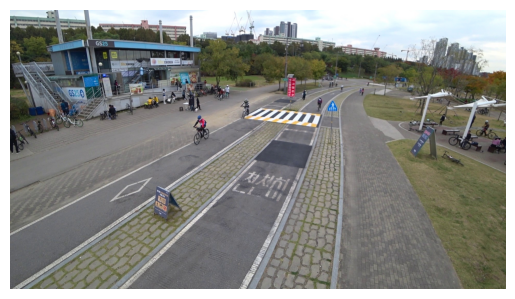

./data/input/CCTV/야간/우천/실증/C005621_000_0108_C_N_R_0.jpg


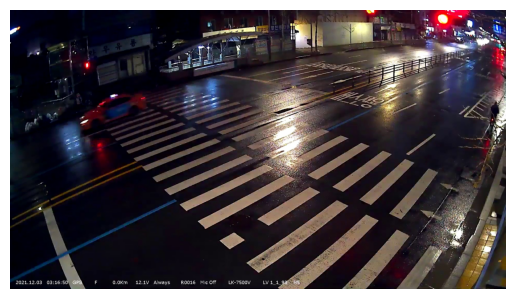

./data/input/CCTV/주간/우천/실증/S000039_009_0154_C_D_R_0.jpg


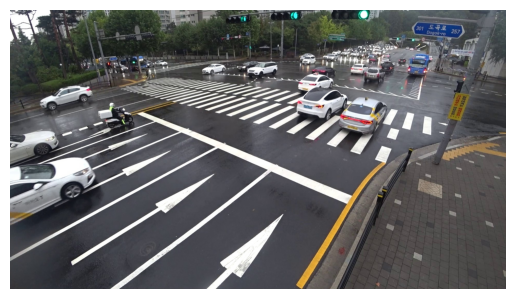

./data/input/CCTV/야간/우천/실증/S000898_009_0294_C_N_R_0.jpg


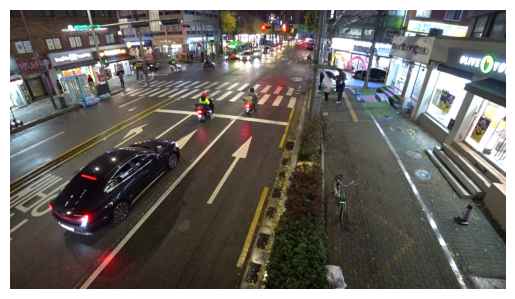

In [7]:
# CCTV 사진
show_file_image(cctv_path[:5])

In [11]:
# 블랙박스 라벨 데이터 만들기
label1 = str.replace(box_path[0], '.jpg', '.json') # 파일 형식 json으로 글자 변환
label1 = str.replace(label1, 'input', 'label') # 폴더 경로 input -> label
label1

'./data/label/블랙박스/야간/맑음/실증/T004326_000_0160_B_N_F_0.json'

In [12]:
with open(label1, 'r') as f:
    lab1 = json.load(f)
print(json.dumps(lab1, indent=4))

{
    "info": {
        "video_id": "T004326",
        "clip_id": "000",
        "device": "B",
        "time": "N",
        "weather": "F",
        "is_scripted": "0"
    },
    "description": {
        "frame_id": "0160",
        "imageWidth": 1920,
        "imageHeight": 1080
    },
    "annotations": {
        "environment": [
            {
                "area_code": "3",
                "shape_type": "polygon",
                "points": [
                    [
                        733.1538786314453,
                        711.6200998246318
                    ],
                    [
                        970.3092054624838,
                        1152.7236877217629
                    ],
                    [
                        1038.0678702713521,
                        1481.2378982885077
                    ],
                    [
                        948.7496302960258,
                        1692.5357708126578
                    ],
                    [
    

In [13]:
a = np.array(lab1['annotations']['PM'][0]['points'])
x = int(a[0])
y = int(a[1])
w = int(a[2])
h = int(a[3])

In [14]:
# polygon에서 x,y 좌표의 순서가 반대로 되어있음.
p = np.array([[y,x] for x,y in lab1['annotations']['environment'][0]['points']])

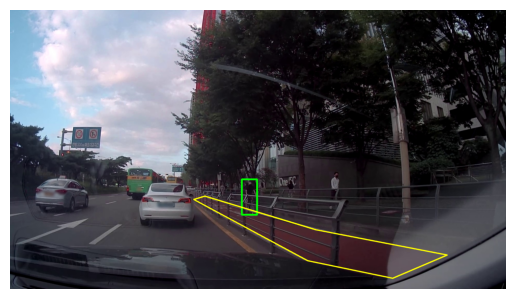

In [15]:
# 이미지와 라벨링 출력
img1 = cv2.imread(box_path[0])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img1)

cv2.rectangle(img1, (x,y), (x+w, y+h), (0, 255, 0), 5)
cv2.polylines(img1, [p.astype(int)], True, (255, 255, 0), 3)
plt.imshow(img1)

#### 전처리 과정 중 발견
1. 데이터는 블랙박스, CCTV로 나누어져 있고 그 안에 주간, 야간, 날씨여부, 실제 or 연출 여부로 세분화 되어있다.
2. PM에서의 바운딩 박스 points는 x,y,w,h 형태로 이루어져있다.
3. environments의 polygon의 points는 [y,x] 형태로 이루어져있다.

#### 추가로 알아볼 점
1. 각각의 area_code, pm_code가 무엇을 나타내는지

# 2. 라벨 분포

## 2-1. CCTV 실증 데이터

In [15]:
cctv_file = load_file(CCTV_PATH, data_set='input')
len(cctv_file) # 각각의 폴더도 포함된 것 같음. 노션 총합은 33,181. 4개의 폴더를 빼면 33,177 맞음.

33177

In [17]:
# label
cctv_label = load_file(CCTV_PATH, 'label')
print(len(cctv_label))
print(cctv_label[0])

33177
./data/label/CCTV/주간/맑음/실증/S002101_102_0154_C_D_F_0.json


In [171]:
# 위반 코드 count를 위한 리스트 생성
pm_list = []
for i in range(13,37):
    pm_list.append([str(i), 0])
pm_list.remove(['34',0])
pm_dict = dict(pm_list)

In [173]:
# 위반 코드 counting
from tqdm import tqdm

for pm in tqdm(cctv_label):
    with open(pm, 'r') as f:
        lab = json.load(f)
    for code in lab['annotations']['PM']:
        for key, val in pm_dict.items():
            if code['PM_code'] == key:
                pm_dict[key] += 1

100%|██████████| 33177/33177 [00:42<00:00, 785.25it/s] 


In [174]:
# 위반 코드별 count 결과
pm_dict

{'13': 9998,
 '14': 1937,
 '15': 374,
 '16': 246,
 '17': 7400,
 '18': 8130,
 '19': 433,
 '20': 7536,
 '21': 1944,
 '22': 6323,
 '23': 8765,
 '24': 526,
 '25': 1494,
 '26': 423,
 '27': 8460,
 '28': 185,
 '29': 121,
 '30': 483,
 '31': 177,
 '32': 14,
 '33': 78,
 '35': 330,
 '36': 39}

In [49]:
# 라벨 정보
category = [
    '오토바이 탑승자',
    '오토바이 탑승자_보행자도로 통행 위반',
    '오토바이 탑승자_안전모 미착용 위반',
    '오토바이 탑승자_무단횡단 위반',
    '오토바이 탑승자_신호 위반',
    '오토바이 탑승자_정지선 위반',
    '오토바이 탑승자_횡단보도 주행 위반',
    '자전거 탑승자',
    '자전거 캐리어',
    '자전거 탑승자_보행자도로 통행 위반',
    '자전거 탑승자_안전모 미착용 위반',
    '자전거 탑승자_무단횡단 위반',
    '자전거 탑승자_신호 위반',
    '자전거 탑승자_정지선 위반',
    '자전거 탑승자_횡단보도 주행 위반',
    '킥보드 탑승자',
    '킥보드 캐리어',
    '킥보드 탑승자_보행자도로 통행 위반',
    '킥보드 탑승자_안전모 미착용 위반',
    '킥보드 탑승자_무단횡단 위반',
    '킥보드 탑승자_신호 위반',
    '킥보드 탑승자_횡단보도 주행 위반',
    '킥보드 탑승자_동승자 탑승 위반'
]
len(category)

23

In [184]:
# 라벨 정보와 결합하여 데이터 프레임 형태로 변환
col = [key for key in pm_dict.keys()]
val = [val for val in pm_dict.values()]
df_code = pd.DataFrame({'code' : col, 'value' : val, 'category': category})
df_code = df_code.sort_values('value', ascending=False).reset_index(drop = True)
df_code.head()

,code,value,category
0,13,9998,오토바이 탑승자
1,23,8765,자전거 탑승자_안전모 미착용 위반
2,27,8460,자전거 탑승자_횡단보도 주행 위반
3,18,8130,오토바이 탑승자_정지선 위반
4,20,7536,자전거 탑승자


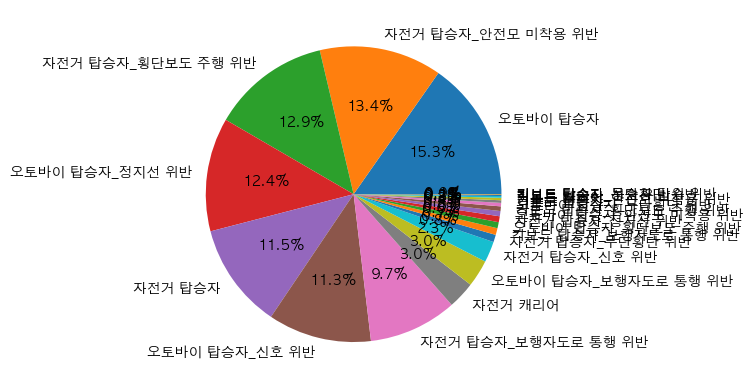

In [185]:
# 위반 코드별 그래프
plt.axis('equal')
plt.pie(df_code['value'], labels = df_code['category'], autopct='%1.1f%%')
plt.show()

In [186]:
non_violations = df_code.loc[df_code.code.isin(['13', '20', '21', '28', '29']), 'value'].sum()
violations = df_code.loc[~df_code.code.isin(['13', '20', '21', '28', '29']), 'value'].sum()
total_vaiolations = df_code.value.sum()
print(violations/total_vaiolations)

0.6975663446251682


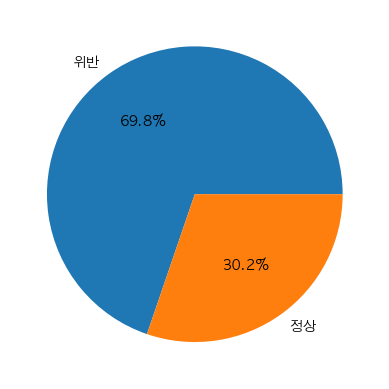

In [187]:
# 정상 및 위반 비율 그래프
plt.pie([violations/total_vaiolations, non_violations/total_vaiolations], labels = ['위반', '정상'], autopct='%.1f%%')
plt.show()

In [188]:
motor = df_code.loc[df_code.code.isin(['13', '14', '15', '16', '17', '18', '19']), 'value'].sum()
bic = df_code.loc[df_code.code.isin(['20', '21', '22', '23', '24', '25', '26', '27']), 'value'].sum()
kick = df_code.loc[df_code.code.isin(['28', '29', '30', '31', '32', '33', '34', '35', '36']), 'value'].sum()
assert motor + bic + kick == df_code.value.sum()

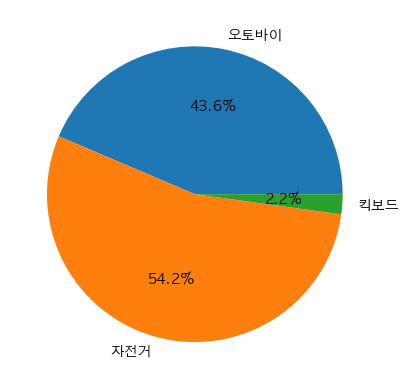

In [189]:
# 이동 장치별 비율
plt.pie([motor/total_vaiolations, bic/total_vaiolations, kick/total_vaiolations], labels = ['오토바이', '자전거', '킥보드'], autopct='%.1f%%')
plt.show()

In [190]:
# 대분류 카테고리별 비율
ped = df_code.loc[df_code.category.str.contains('보행자도로 통행'), 'value'].sum()
stop = df_code.loc[df_code.category.str.contains('정지선'), 'value'].sum()
signal = df_code.loc[df_code.category.str.contains('신호 위반'), 'value'].sum()
cross = df_code.loc[df_code.category.str.contains('횡단보도'), 'value'].sum()
jay = df_code.loc[df_code.category.str.contains('무단횡단'), 'value'].sum()
safe = df_code.loc[df_code.category.str.contains('안전모'), 'value'].sum()
passenger = df_code.loc[df_code.category.str.contains('동승자'), 'value'].sum()
normal = df_code.loc[df_code.category.isin(['오토바이 탑승자', '자전거 탑승자', '자전거 캐리어', '킥보드 탑승자', '킥보드 캐리어']), 'value'].sum()
#assert ped+stop+signal+cross+jay+safe+passenger+normal == total_vaiolations
#ped+stop+signal+cross+jay+safe+passenger

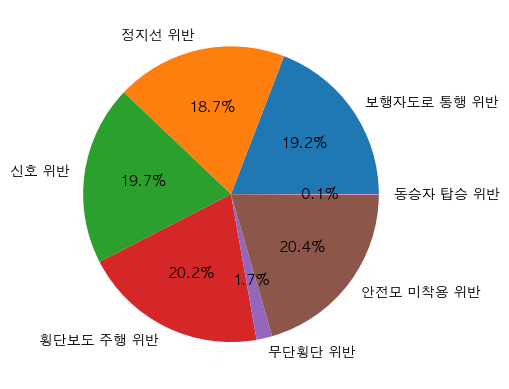

In [191]:
# 대분류 카테고리별 위반 비율 그래프
plt.pie([ped, stop, signal, cross, jay, safe, passenger], labels = ['보행자도로 통행 위반', '정지선 위반', '신호 위반', '횡단보도 주행 위반', '무단횡단 위반', '안전모 미착용 위반', '동승자 탑승 위반'], autopct='%.1f%%')
plt.show()

- CCTV 데이터는 다양한 위반 사례가 고르게 분포되어 있다.
- 킥보드 데이터의 비율이 매우 적다.
- 블랙박스 데이터를 통해 킥보드 데이터의 비율을 늘릴 수 있다.

## 2-2 블랙박스 실증 + 연출 데이터

In [42]:
# 파일 불러오기
# 블랙박스는 실증 데이터가 부족하기 때문에 연출 데이터도 활용
def load_file2(file_path, data_set='input'):
    paths = []
    file_path = file_path.replace('...', data_set)
    data_list = ['/주간/맑음/실증/', '/주간/우천/실증/', '/야간/맑음/실증/', '/야간/우천/실증/', '/주간/맑음/연출/', '/주간/우천/연출/']
    for i in data_list:
        file_list = os.listdir(file_path + i)
        file_list = [file_path + i + file for file in file_list]
        print(len(file_list))
        paths += file_list
    paths = list(set(paths))
    return paths

In [43]:
box_label = load_file2(BOX_PATH, data_set='label')
print('최종 개수: ', len(box_label))

161
33
18
3
2457
60
최종 개수:  2732


In [45]:
box_pm_list = []

for i in range(13,37):
    box_pm_list.append([str(i), 0])
box_pm_list.remove(['34',0])
box_pm_dict = dict(box_pm_list)

In [46]:
for pm in tqdm(box_label):
    with open(pm, 'r') as f:
        lab = json.load(f)
    for code in lab['annotations']['PM']:
        for key, val in box_pm_dict.items():
            if code['PM_code'] == key:
                box_pm_dict[key] += 1

100%|██████████| 2732/2732 [00:06<00:00, 414.30it/s]


In [209]:
# 블랙박스 데이터 위반별 count
box_pm_dict

{'13': 47,
 '14': 12,
 '15': 1,
 '16': 0,
 '17': 9,
 '18': 16,
 '19': 1,
 '20': 22,
 '21': 9,
 '22': 40,
 '23': 100,
 '24': 0,
 '25': 10,
 '26': 0,
 '27': 123,
 '28': 1682,
 '29': 15,
 '30': 618,
 '31': 214,
 '32': 2,
 '33': 10,
 '35': 55,
 '36': 142}

In [50]:
box_col = [key for key in box_pm_dict.keys()]
box_val = [val for val in box_pm_dict.values()]
df_box = pd.DataFrame({'code' : box_col, 'value' : box_val, 'category': category})
df_box = df_box.sort_values('value', ascending=False).reset_index(drop = True)
df_box.head()

,code,value,category
0,28,1681,킥보드 탑승자
1,30,618,킥보드 탑승자_보행자도로 통행 위반
2,31,214,킥보드 탑승자_안전모 미착용 위반
3,36,141,킥보드 탑승자_동승자 탑승 위반
4,27,123,자전거 탑승자_횡단보도 주행 위반


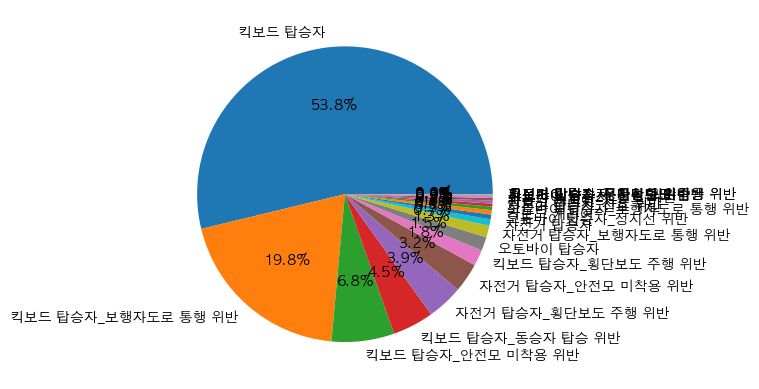

In [51]:
# 위반 코드별 그래프
plt.axis('equal')
plt.pie(df_box['value'], labels = df_box['category'], autopct='%1.1f%%')
plt.show()

In [52]:
non_violations = df_box.loc[df_box.code.isin(['13', '20', '21', '28', '29']), 'value'].sum()
violations = df_box.loc[~df_box.code.isin(['13', '20', '21', '28', '29']), 'value'].sum()
total_vaiolations = df_box.value.sum()
print(violations/total_vaiolations)

0.4325015994881638


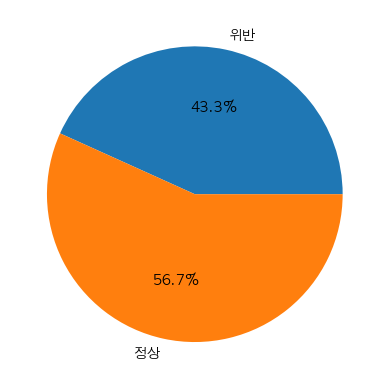

In [53]:
# 블랙박스 데이터 위반별 비율
plt.pie([violations/total_vaiolations, non_violations/total_vaiolations], labels = ['위반', '정상'], autopct='%.1f%%')
plt.show()

In [54]:
motor = df_box.loc[df_box.code.isin(['13', '14', '15', '16', '17', '18', '19']), 'value'].sum()
bic = df_box.loc[df_box.code.isin(['20', '21', '22', '23', '24', '25', '26', '27']), 'value'].sum()
kick = df_box.loc[df_box.code.isin(['28', '29', '30', '31', '32', '33', '34', '35', '36']), 'value'].sum()
assert motor + bic + kick == df_box.value.sum()

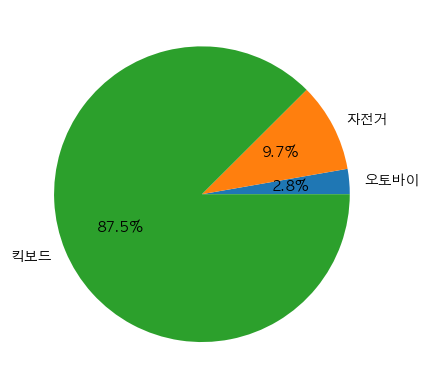

In [55]:
plt.pie([motor/total_vaiolations, bic/total_vaiolations, kick/total_vaiolations], labels = ['오토바이', '자전거', '킥보드'], autopct='%.1f%%')
plt.show()

In [59]:
ped = df_box.loc[df_box.category.str.contains('보행자도로 통행'), 'value'].sum()
stop = df_box.loc[df_box.category.str.contains('정지선'), 'value'].sum()
signal = df_box.loc[df_box.category.str.contains('신호 위반'), 'value'].sum()
cross = df_box.loc[df_box.category.str.contains('횡단보도'), 'value'].sum()
jay = df_box.loc[df_box.category.str.contains('무단횡단'), 'value'].sum()
safe = df_box.loc[df_box.category.str.contains('안전모'), 'value'].sum()
passenger = df_box.loc[df_box.category.str.contains('동승자'), 'value'].sum()
normal = df_box.loc[df_box.category.isin(['오토바이 탑승자', '자전거 탑승자', '자전거 캐리어', '킥보드 탑승자', '킥보드 캐리어']), 'value'].sum()
#assert ped+stop+signal+cross+jay+safe+passenger+normal == total_vaiolations
#ped+stop+signal+cross+jay+safe+passenger

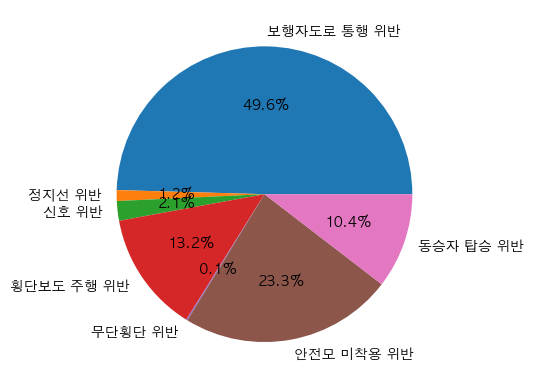

In [60]:
plt.pie([ped, stop, signal, cross, jay, safe, passenger], labels = ['보행자도로 통행 위반', '정지선 위반', '신호 위반', '횡단보도 주행 위반', '무단횡단 위반', '안전모 미착용 위반', '동승자 탑승 위반'], autopct='%.1f%%')
plt.show()

- 블랙박스 데이터에는 킥보드 탑승자 유형이 제일 많고, 보행자도로 통행 위반 사례가 대분류 카테고리의 약 절반 정도를 차지한다.
- 블랙박스 데이터는 CCTV 데이터보다 더 가까이 촬영되었을 것이고, 연출 데이터를 통해 기존 데이터셋에서 가장 적은 비중을 차지하고 있는 킥보드 유형의 비율을 늘린 것으로 판단된다.

#### 데이터 구축시 유의 사항
- ##### CCTV 데이터와 블랙박스 데이터를 합치고 위반 코드별로 기존 데이터셋과 유사한 위반 코드 비율로 샘플 데이터셋을 구축한다.
- ##### 블랙박스 데이터에서 킥보드 데이터를 모두 사용하여 킥보드 유형에 대한 예측도 잘 이루어질 수 있도록 한다.